In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import linear_model
from word2number import w2n

In [2]:
df = pd.read_csv("linear_regression.csv")

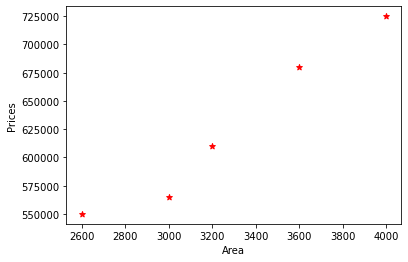

In [3]:
%matplotlib inline 
plt.xlabel("Area")
plt.ylabel("Prices")
plt.scatter(df.area, df.price, color='r', marker='*')

In [4]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']], df.price)

LinearRegression()

In [5]:
reg.predict([[3300]])

array([628715.75342466])

In [6]:
reg.coef_

array([135.78767123])

In [7]:
reg.intercept_

180616.43835616432

In [8]:
#y=mx+b
135.78767123*3300+180616.43835616432

628715.7534151643

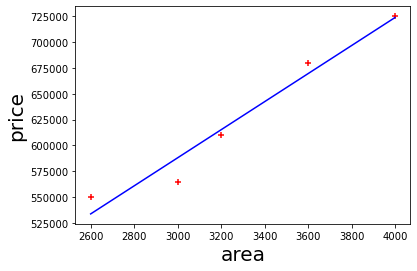

In [9]:
%matplotlib inline 
plt.xlabel('area', fontsize=20)
plt.ylabel('price', fontsize=20)
plt.scatter(df.area, df.price, color = 'r', marker="+")
plt.plot(df.area,reg.predict(df[['area']]), color = 'blue')

In [10]:
reg.predict([[5000]])

array([859554.79452055])

In [11]:
d = pd.read_csv("areas.csv")
d.head(4)

,areas
0,10000
1,5500
2,4500
3,4500


In [12]:
p = reg.predict(d)

In [13]:
d['prices'] = p
d.to_csv("predictions.csv")

In [21]:
#Calculating r squared
correlation_matrix = np.corrcoef(d.areas, d.prices, dtype='float64')
print(correlation_matrix)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
r_squared

[[1. 1.]
 [1. 1.]]


1.0

Saving your model using pickle

In [22]:
import pickle #pickle allows you to serialise your python object into a file

In [27]:
with open('model_pickle', 'wb') as f:
    pickle.dump(reg, f)
    #wb for binary data
    #dump my model in this file f

In [25]:
with open('model_pickle', 'rb') as f:
    mp = pickle.load(f)
mp.predict([[3300]])
#rb for read binary 
#wb for write binary

array([628715.75342466])

In [31]:
#joblib does the same job as pickle but is more efficient if we have a lot of numpy arrays 
import joblib
joblib.dump(reg, 'model_joblib')
#saved the model directly to the file model_joblib

['model_joblib']

In [34]:
mj=joblib.load('model_joblib')
mj.coef_     #same as reg.coef_

array([135.78767123])

array([135.78767123])

Canada per capita exercise 

In [14]:
data = pd.read_csv("canada_percapita.csv")
data.head(4)

,year,per_capita_income
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248


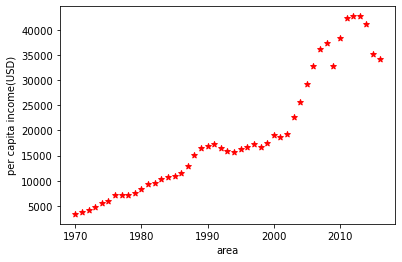

In [15]:
%matplotlib inline
plt.xlabel("area")
plt.ylabel("per capita income(USD)")
plt.scatter(data.year, data.per_capita_income, color='red', marker='*')
#plt.plot(data.year, rex.predict(data[['year']]),color='black')

In [16]:
rex = linear_model.LinearRegression()
rex.fit(data[['year']], data.per_capita_income)

LinearRegression()

In [17]:
rex.predict([[2020]])

array([41288.69409442])

In [18]:
rex.coef_

array([828.46507522])

In [19]:
rex.intercept_

-1632210.7578554575

In [20]:
828.46507522 * 2020 + (-1632210.7578554575)

41288.694088942604

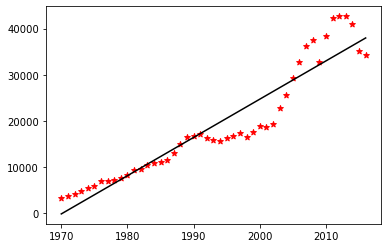

In [21]:
%matplotlib inline
xlabel = "year"
ylabel = "per capita income"
plt.scatter(data.year, data.per_capita_income, color='red', marker='*')
plt.plot(data.year, rex.predict(data[['year']]), color="black")

Linear Regression Multiple Variables


price = m1*area + m2 * bedrooms + m3 * age + b

In [22]:
data2 = pd.read_csv("linear_multivariate.csv")
data2

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [23]:
#handling missing value 
import math 
#math.floor used for getting int value of median and not float 
median_bedrooms = math.floor(data2.bedrooms.median())
median_bedrooms

3

In [24]:
# filling the NaN value with median using fillna function

In [25]:
data2.bedrooms = data2.bedrooms.fillna(median_bedrooms)
data2

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,3.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [26]:
#regg is linear regression model object 
regg = linear_model.LinearRegression()
#fit() is used to train your model using your training set 
#Syntax : regg.fit(data[['IV1', 'IV2', 'IV3']], data.targetvariable(DV))
regg.fit(data2[['area', 'bedrooms', 'age']], data2.price)

LinearRegression()

In [27]:
regg.coef_

array([   137.25, -26025.  ,  -6825.  ])

In [28]:
regg.intercept_

383724.9999999998

In [29]:
regg.predict([[3000, 3, 40]])

array([444400.])

In [30]:
regg.predict([[2500, 4, 5]])

array([588625.])

In [31]:
#y = m1*area + m2*bedrooms + m3*age + b
137.25 * 3000 + (-26025*3) + (-6825*40) + 383725

444400.0

In [20]:
hiring = pd.read_csv("hiring.csv")
hiring

,experience,test_score,interview_score,salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [21]:
import math 
median_test_score = math.floor(hiring.test_score.median())
median_test_score
hiring

,experience,test_score,interview_score,salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [26]:
hiring

,experience,test_score,interview_score,salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [27]:
hiring.test_score = hiring.test_score.fillna(median_test_score)
hiring['experience'] = hiring['experience'].fillna("zero")
#hiring.experience = hiring.experience.apply(w2n.word_to_num)
hiring

,experience,test_score,interview_score,salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [28]:
reg1 = linear_model.LinearRegression()
reg1.fit(hiring[['experience', 'test_score', 'interview_score']], hiring.salary)

LinearRegression()

In [29]:
reg1.predict([[2, 9, 6]])

array([53205.96797671])

In [30]:
reg1.predict([[12, 10, 10]])

array([92002.18340611])

In [31]:
reg1.coef_

array([2812.95487627, 1845.70596798, 2205.24017467])

In [32]:
reg1.intercept_

17737.26346433768